### Neural Network Modelling

### Import relevant libraries and datasets

In [115]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

from imblearn.over_sampling import RandomOverSampler

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from joblib import dump, load

In [116]:
df = pd.read_csv('weatherAUS_imputed.csv')
display(df.head())
df.shape

,Date,Location,Year,Month,RainToday,RainTomorrow,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindGustDir_angle,Latitude,Longitude,Cloud,Pressure,Temperature,Humidity,temp_fluctuation
0,2009-01-01,Cobar,2009,1,0.0,0.0,-0.254034,1.452543,1.231645,0.544048,0.367568,-0.016581,0.134517,-0.346762,-1.566909,1.483789,-2.239319,1.266185
1,2009-01-02,Cobar,2009,1,0.0,0.0,-0.254034,2.092290,1.417426,-0.274399,0.142577,-0.016581,0.134517,-1.337620,-0.534263,0.523016,-2.103988,-0.123978
2,2009-01-03,Cobar,2009,1,0.0,0.0,-0.254034,1.589632,1.497046,-0.795229,-0.307405,-0.016581,0.134517,-1.337620,-0.664246,1.892307,-2.753579,1.531952
3,2009-01-04,Cobar,2009,1,0.0,0.0,-0.254034,1.178365,0.780464,0.395239,-1.432358,-0.016581,0.134517,-0.346762,-0.787008,1.756134,-1.400263,1.450178
4,2009-01-05,Cobar,2009,1,0.0,0.0,-0.254034,1.315454,1.205105,-0.720824,1.267530,-0.016581,0.134517,-0.544934,-0.765344,1.839351,-1.535595,1.102637


(67725, 18)

### Neural Network Classification

### 1. Without any over oder undersampling

### 1.1 Baseline Neural Network

In [117]:
data = df.drop(columns=['RainTomorrow', 'Location', 'Date'])
target = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42, stratify=target)

In [131]:
baseline_model = Sequential()
baseline_model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))
baseline_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
baseline_model.summary()

Model: "sequential_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_169 (Dense)           (None, 1)                 16        
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [132]:
training_history1 = baseline_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=100)

Epoch 1/20
542/542 [==============================] - 1s 2ms/step - loss: 412.1033 - accuracy: 0.2253 - val_loss: 1.9581 - val_accuracy: 0.7869
Epoch 2/20
542/542 [==============================] - 1s 1ms/step - loss: 0.8313 - accuracy: 0.7646 - val_loss: 0.7286 - val_accuracy: 0.7719
Epoch 3/20
542/542 [==============================] - 1s 1ms/step - loss: 0.6875 - accuracy: 0.7845 - val_loss: 0.6418 - val_accuracy: 0.8059
Epoch 4/20
542/542 [==============================] - 1s 1ms/step - loss: 0.6018 - accuracy: 0.7972 - val_loss: 0.5545 - val_accuracy: 0.7999
Epoch 5/20
542/542 [==============================] - 1s 1ms/step - loss: 0.5228 - accuracy: 0.8095 - val_loss: 0.4743 - val_accuracy: 0.8159
Epoch 6/20
542/542 [==============================] - 1s 1ms/step - loss: 0.4510 - accuracy: 0.8217 - val_loss: 0.4173 - val_accuracy: 0.8374
Epoch 7/20
542/542 [==============================] - 1s 1ms/step - loss: 0.3984 - accuracy: 0.8317 - val_loss: 0.3687 - val_accuracy: 0.8415
Epoc

In [133]:
acc1 = training_history1.history['accuracy']
val1 = training_history1.history['val_accuracy']
epochs = range(1, len(acc1) + 1)

[]

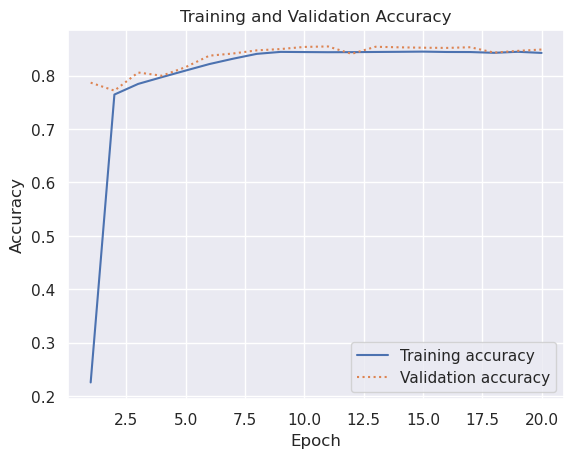

In [134]:
plt.plot(epochs, acc1, '-', label='Training accuracy')
plt.plot(epochs, val1, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

424/424 [==============================] - 0s 561us/step


Text(109.44999999999997, 0.5, 'Actual label')

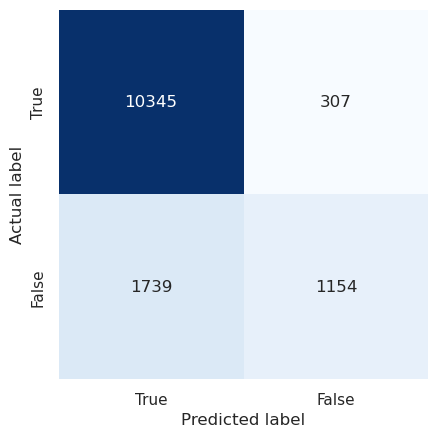

In [135]:
y_pred_prob1 = baseline_model.predict(X_test) > 0.5
y_pred1 = (y_pred_prob1 > 0.5).astype(int)
mat = confusion_matrix(y_test, y_pred1)
labels = ['True', 'False']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [136]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     10652
         1.0       0.79      0.40      0.53      2893

    accuracy                           0.85     13545
   macro avg       0.82      0.69      0.72     13545
weighted avg       0.84      0.85      0.83     13545



### 1.2 Adding more layers 

In [137]:
model2 = Sequential()
model2.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_170 (Dense)           (None, 32)                512       
                                                                 
 dense_171 (Dense)           (None, 32)                1056      
                                                                 
 dense_172 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [138]:
training_history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=100)

Epoch 1/20
542/542 [==============================] - 2s 4ms/step - loss: 7.0071 - accuracy: 0.7823 - val_loss: 0.3668 - val_accuracy: 0.8363
Epoch 2/20
542/542 [==============================] - 2s 3ms/step - loss: 0.4337 - accuracy: 0.8146 - val_loss: 0.5127 - val_accuracy: 0.8109
Epoch 3/20
542/542 [==============================] - 2s 4ms/step - loss: 0.4068 - accuracy: 0.8240 - val_loss: 0.8514 - val_accuracy: 0.6000
Epoch 4/20
542/542 [==============================] - 2s 4ms/step - loss: 0.4570 - accuracy: 0.8161 - val_loss: 0.4010 - val_accuracy: 0.8385
Epoch 5/20
542/542 [==============================] - 2s 4ms/step - loss: 0.4016 - accuracy: 0.8287 - val_loss: 0.3451 - val_accuracy: 0.8482
Epoch 6/20
542/542 [==============================] - 2s 4ms/step - loss: 0.4306 - accuracy: 0.8207 - val_loss: 0.6202 - val_accuracy: 0.8039
Epoch 7/20
542/542 [==============================] - 3s 5ms/step - loss: 0.4039 - accuracy: 0.8298 - val_loss: 0.6923 - val_accuracy: 0.7944
Epoch 

In [139]:
acc2 = training_history2.history['accuracy']
val2 = training_history2.history['val_accuracy']
epochs = range(1, len(acc2) + 1)

[]

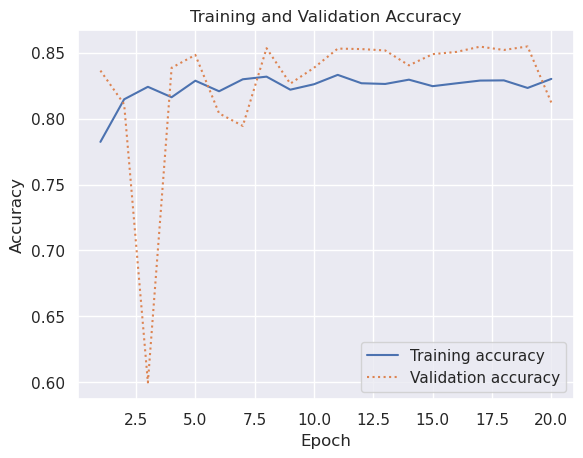

In [140]:
plt.plot(epochs, acc2, '-', label='Training accuracy')
plt.plot(epochs, val2, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

424/424 [==============================] - 1s 2ms/step


Text(109.44999999999997, 0.5, 'Actual label')

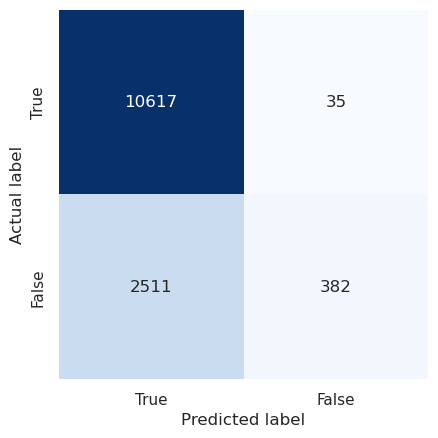

In [141]:
y_pred_prob2 = model2.predict(X_test) > 0.5
y_pred2 = (y_pred_prob2 > 0.5).astype(int)
mat = confusion_matrix(y_test, y_pred2)
labels = ['True', 'False']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [15]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.96      0.64      0.77     10652
         1.0       0.41      0.90      0.56      2893

    accuracy                           0.70     13545
   macro avg       0.68      0.77      0.67     13545
weighted avg       0.84      0.70      0.73     13545



### 1.3 GridSearch

In [50]:
def build_classifier(learn_rate):
    # Initialising the DNN
    classifier = Sequential()
    classifier.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    classifier.add(Dense(32, activation='relu'))
    classifier.add(Dense(1, activation='sigmoid'))
    opt = Adam(learning_rate=learn_rate)
    classifier.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return classifier


In [53]:
classifier = KerasClassifier(build_fn = build_classifier)
print(classifier.get_params().keys())
# grid search epochs, batch size and optimizer
epochs = [10]
batches = [100]
lr=[0.1,0.01, 0.001]
param_grid = dict(epochs=epochs, batch_size=batches, learn_rate=lr)
grid = GridSearchCV(estimator=classifier, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

dict_keys(['build_fn'])
Epoch 1/10


/tmp/ipykernel_28734/3052226752.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier)


434/434 [==============================] - 2s 3ms/step - loss: 2.9522 - accuracy: 0.7820
Epoch 2/10
434/434 [==============================] - 1s 3ms/step - loss: 0.5185 - accuracy: 0.7872
Epoch 3/10
434/434 [==============================] - 1s 3ms/step - loss: 0.5189 - accuracy: 0.7872
Epoch 4/10
434/434 [==============================] - 1s 3ms/step - loss: 0.5193 - accuracy: 0.7872
Epoch 5/10
434/434 [==============================] - 2s 4ms/step - loss: 0.5194 - accuracy: 0.7872
Epoch 6/10
434/434 [==============================] - 2s 4ms/step - loss: 0.5188 - accuracy: 0.7872
Epoch 7/10
434/434 [==============================] - 1s 3ms/step - loss: 0.5189 - accuracy: 0.7872
Epoch 8/10
434/434 [==============================] - 2s 3ms/step - loss: 0.5189 - accuracy: 0.7872
Epoch 9/10
434/434 [==============================] - 2s 4ms/step - loss: 0.5191 - accuracy: 0.7872
Epoch 10/10
109/109 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.7833
Epoch 1/10

In [64]:
dump(grid_result.best_params_, 'grid_dnn.joblib')

['grid_dnn.joblib']

In [65]:
grid_dnn = load('grid_dnn.joblib')

In [66]:
grid_result.best_params_

{'batch_size': 100, 'epochs': 10, 'learn_rate': 0.01}

### 1.4 Model with best parameters

In [74]:
model_best = build_classifier(0.01)

In [75]:
training_history_best = model_best.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
542/542 [==============================] - 3s 5ms/step - loss: 2.5419 - accuracy: 0.7732 - val_loss: 0.3485 - val_accuracy: 0.8467
Epoch 2/10
542/542 [==============================] - 2s 4ms/step - loss: 0.4595 - accuracy: 0.8126 - val_loss: 0.3996 - val_accuracy: 0.8299
Epoch 3/10
542/542 [==============================] - 2s 4ms/step - loss: 0.3817 - accuracy: 0.8301 - val_loss: 0.3724 - val_accuracy: 0.8383
Epoch 4/10
542/542 [==============================] - 3s 5ms/step - loss: 0.3769 - accuracy: 0.8357 - val_loss: 0.3849 - val_accuracy: 0.8351
Epoch 5/10
542/542 [==============================] - 2s 4ms/step - loss: 0.3730 - accuracy: 0.8339 - val_loss: 0.3627 - val_accuracy: 0.8425
Epoch 6/10
542/542 [==============================] - 2s 5ms/step - loss: 0.3615 - accuracy: 0.8404 - val_loss: 0.3503 - val_accuracy: 0.8466
Epoch 7/10
542/542 [==============================] - 3s 5ms/step - loss: 0.3620 - accuracy: 0.8398 - val_loss: 0.3490 - val_accuracy: 0.8504
Epoch 

In [76]:
acc_best = training_history_best.history['accuracy']
val_best = training_history_best.history['val_accuracy']
epochs = range(1, len(acc_best) + 1)

[]

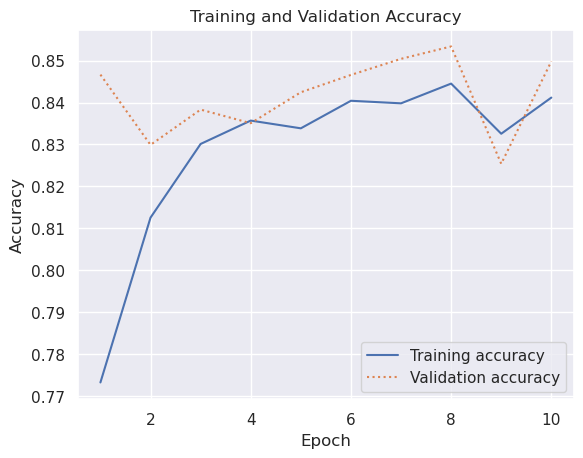

In [77]:
plt.plot(epochs, acc_best, '-', label='Training accuracy')
plt.plot(epochs, val_best, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

424/424 [==============================] - 0s 531us/step


Text(109.44999999999997, 0.5, 'Actual label')

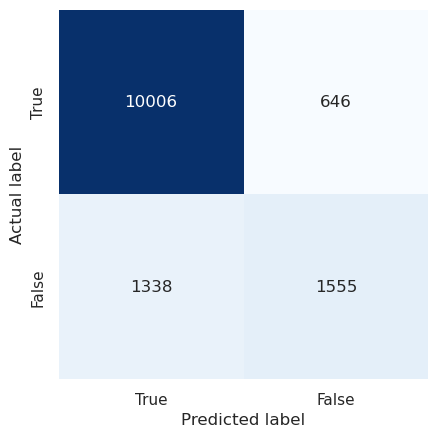

In [78]:
y_pred_prob_best = baseline_model.predict(X_test) > 0.5
y_pred_best = (y_pred_prob_best > 0.5).astype(int)
mat = confusion_matrix(y_test, y_pred_best)
labels = ['True', 'False']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [79]:
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     10652
         1.0       0.71      0.54      0.61      2893

    accuracy                           0.85     13545
   macro avg       0.79      0.74      0.76     13545
weighted avg       0.84      0.85      0.85     13545



The models we got so far seem quite unstable so far. This is certainly due the stochastic nature of the model, i.e stochastic gradient descent introduced randomness through mini-batch sampling which can cause the optimization process to converge to different local minima. This seems to be the case four our models. 

Let's see a) if random oversampling and b) adding more layers solves part of the problem. 

### 2. Random Oversampling

In [118]:
ros = RandomOverSampler()
sample_ros = ros.fit_resample(data,target)

In [119]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(sample_ros[0], sample_ros[1], test_size=0.2, random_state=20)

In [120]:
model_ros = build_classifier(0.01)

In [121]:
training_history_ros = model_best.fit(X_train_ros, y_train_ros, validation_data=(X_test_ros, y_test_ros), epochs=10, batch_size=100)

Epoch 1/10
853/853 [==============================] - 2s 3ms/step - loss: 0.4446 - accuracy: 0.7907 - val_loss: 0.4566 - val_accuracy: 0.7852
Epoch 2/10
853/853 [==============================] - 4s 4ms/step - loss: 0.4427 - accuracy: 0.7912 - val_loss: 0.4445 - val_accuracy: 0.7823
Epoch 3/10
853/853 [==============================] - 4s 4ms/step - loss: 0.4410 - accuracy: 0.7925 - val_loss: 0.4443 - val_accuracy: 0.7949
Epoch 4/10
853/853 [==============================] - 3s 4ms/step - loss: 0.4427 - accuracy: 0.7931 - val_loss: 0.4466 - val_accuracy: 0.7906
Epoch 5/10
853/853 [==============================] - 5s 6ms/step - loss: 0.4422 - accuracy: 0.7922 - val_loss: 0.4638 - val_accuracy: 0.7833
Epoch 6/10
853/853 [==============================] - 4s 4ms/step - loss: 0.4427 - accuracy: 0.7923 - val_loss: 0.4395 - val_accuracy: 0.7925
Epoch 7/10
853/853 [==============================] - 3s 4ms/step - loss: 0.4409 - accuracy: 0.7921 - val_loss: 0.4467 - val_accuracy: 0.7936
Epoch 

In [122]:
acc_ros = training_history_ros.history['accuracy']
val_ros = training_history_ros.history['val_accuracy']
epochs = range(1, len(acc_ros) + 1)

[]

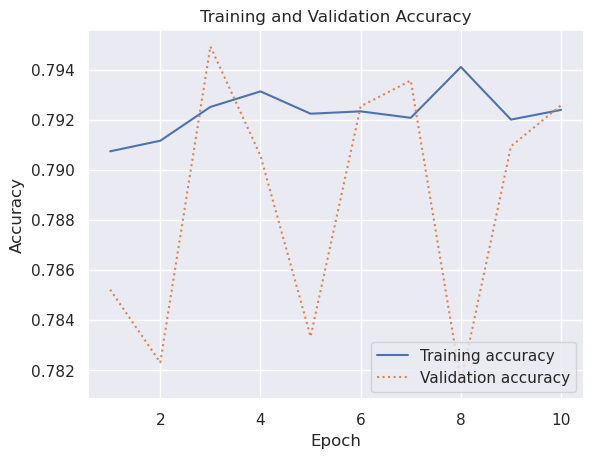

In [123]:
plt.plot(epochs, acc_ros, '-', label='Training accuracy')
plt.plot(epochs, val_ros, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

666/666 [==============================] - 1s 2ms/step


Text(109.44999999999997, 0.5, 'Actual label')

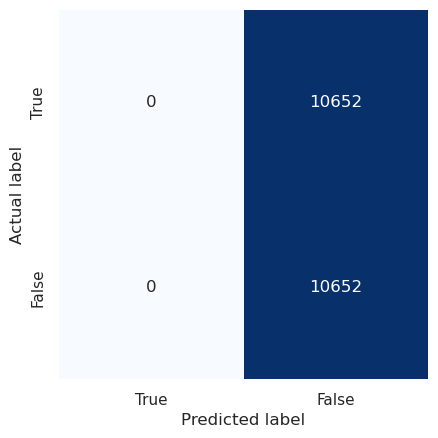

In [124]:
y_pred_prob_ros = model_ros.predict(X_test_ros) > 0.5
y_pred_ros = (y_pred_prob_ros > 0.5).astype(int)
mat = confusion_matrix(y_test_ros, y_pred_ros)
labels = ['True', 'False']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [125]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     10652
         1.0       0.50      1.00      0.67     10652

    accuracy                           0.50     21304
   macro avg       0.25      0.50      0.33     21304
weighted avg       0.25      0.50      0.33     21304



/home/claudia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/claudia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/claudia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Implementing Random Sampling did not stabilize the model and class 1 is systematically underperforming, i.e. all scores are 0. 

### 3. Adding more layers to the model 

In [142]:
model4 = Sequential()
model4.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(16, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=0.1)
model4.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model4.summary()

Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_173 (Dense)           (None, 128)               2048      
                                                                 
 dense_174 (Dense)           (None, 32)                4128      
                                                                 
 dense_175 (Dense)           (None, 16)                528       
                                                                 
 dense_176 (Dense)           (None, 1)                 17        
                                                                 
Total params: 6,721
Trainable params: 6,721
Non-trainable params: 0
_________________________________________________________________


In [143]:
training_history4 = model_best.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100)

Epoch 1/50
542/542 [==============================] - 3s 5ms/step - loss: 0.3466 - accuracy: 0.8464 - val_loss: 0.3375 - val_accuracy: 0.8541
Epoch 2/50
542/542 [==============================] - 3s 5ms/step - loss: 0.3471 - accuracy: 0.8474 - val_loss: 0.3355 - val_accuracy: 0.8551
Epoch 3/50
542/542 [==============================] - 2s 3ms/step - loss: 0.3435 - accuracy: 0.8489 - val_loss: 0.3343 - val_accuracy: 0.8557
Epoch 4/50
542/542 [==============================] - 2s 4ms/step - loss: 0.3452 - accuracy: 0.8479 - val_loss: 0.3441 - val_accuracy: 0.8460
Epoch 5/50
542/542 [==============================] - 2s 4ms/step - loss: 0.3444 - accuracy: 0.8482 - val_loss: 0.3422 - val_accuracy: 0.8501
Epoch 6/50
542/542 [==============================] - 2s 4ms/step - loss: 0.3450 - accuracy: 0.8471 - val_loss: 0.3411 - val_accuracy: 0.8521
Epoch 7/50
542/542 [==============================] - 2s 4ms/step - loss: 0.3452 - accuracy: 0.8471 - val_loss: 0.3388 - val_accuracy: 0.8571
Epoch 

[]

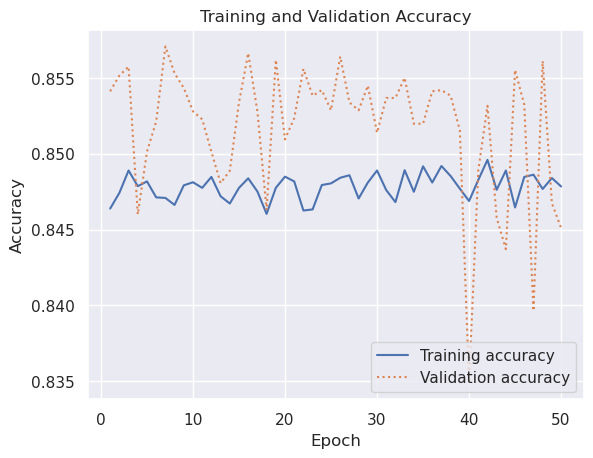

In [144]:
acc4 = training_history4.history['accuracy']
val4 = training_history4.history['val_accuracy']
epochs = range(1, len(acc4) + 1)

plt.plot(epochs, acc4, '-', label='Training accuracy')
plt.plot(epochs, val4, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

424/424 [==============================] - 1s 2ms/step


Text(109.44999999999997, 0.5, 'Actual label')

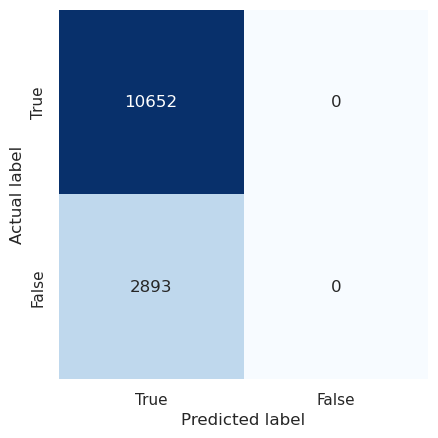

In [145]:
y_pred_prob4 = model4.predict(X_test) > 0.5
y_pred4 = (y_pred_prob4 > 0.5).astype(int)
mat = confusion_matrix(y_test, y_pred4)
labels = ['True', 'False']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [146]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88     10652
         1.0       0.00      0.00      0.00      2893

    accuracy                           0.79     13545
   macro avg       0.39      0.50      0.44     13545
weighted avg       0.62      0.79      0.69     13545



/home/claudia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/claudia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/claudia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4. Conclusion

The Neural Network Model does not perform well. It is unstable and gives low precision and recall scores. It seems that the Gradient Descent converges to different local minima, meaning that the function we are trying to mimize is not convex and the algorithm becomes unpredictable. 

Unfortunately, the gradient descent algorithm is one of the only algorithms that can be used in practice because it is the only efficient optimization algorithm given our computational capabilities.